In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Prepare labels. 

utterance_labels = pd.read_csv('label_data/file_listing_new.csv', header=None)
utterance_labels.columns = ['UTTER_FILE_PATH', 'PIN', 'GENDER', 'AGE', 'EDU', 'NATIVE_LANG', 'WHERE_RAISED', 'TOPICID', 'GEN.DIA']
utterance_labels.info()
utterance_labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227788 entries, 0 to 2227787
Data columns (total 9 columns):
UTTER_FILE_PATH    object
PIN                int64
GENDER             object
AGE                float64
EDU                float64
NATIVE_LANG        object
WHERE_RAISED       object
TOPICID            object
GEN.DIA            object
dtypes: float64(2), int64(1), object(6)
memory usage: 153.0+ MB


,UTTER_FILE_PATH,PIN,GENDER,AGE,EDU,NATIVE_LANG,WHERE_RAISED,TOPICID,GEN.DIA
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,7118,F,41.0,12.0,English,CA,ENG35,f.a
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,8090,F,20.0,14.0,English,FL,ENG35,f.a
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,8090,F,20.0,14.0,English,FL,ENG35,f.a
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,7118,F,41.0,12.0,English,CA,ENG35,f.a
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,7118,F,41.0,12.0,English,CA,ENG35,f.a


In [3]:
utterance_labels_sub = utterance_labels.copy()
utterance_labels_sub = utterance_labels_sub[['UTTER_FILE_PATH', 'GENDER', 'NATIVE_LANG', 'WHERE_RAISED', 'GEN.DIA']]
utterance_labels_sub.head()

,UTTER_FILE_PATH,GENDER,NATIVE_LANG,WHERE_RAISED,GEN.DIA
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,F,English,CA,f.a
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,F,English,FL,f.a
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,F,English,FL,f.a
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,F,English,CA,f.a
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,F,English,CA,f.a


In [4]:
# Extract gender-matched data

utterance_labels_sub.loc[:, 'GEN.DIA'] = utterance_labels_sub['GEN.DIA'].map(lambda x: str.upper(str(x)[:1]))
utterance_labels_sub.head()

,UTTER_FILE_PATH,GENDER,NATIVE_LANG,WHERE_RAISED,GEN.DIA
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,F,English,CA,F
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,F,English,FL,F
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,F,English,FL,F
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,F,English,CA,F
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,F,English,CA,F


In [5]:
utter_gender_matched = utterance_labels_sub[utterance_labels_sub['GENDER'] == utterance_labels_sub['GEN.DIA']]
utter_gender_matched = utter_gender_matched.reset_index(drop=True)
utter_gender_matched.info()
utter_gender_matched.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125073 entries, 0 to 2125072
Data columns (total 5 columns):
UTTER_FILE_PATH    object
GENDER             object
NATIVE_LANG        object
WHERE_RAISED       object
GEN.DIA            object
dtypes: object(5)
memory usage: 81.1+ MB


,UTTER_FILE_PATH,GENDER,NATIVE_LANG,WHERE_RAISED,GEN.DIA
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,F,English,CA,F
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,F,English,FL,F
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,F,English,FL,F
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,F,English,CA,F
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,F,English,CA,F


In [6]:
utter_gender_matched = utter_gender_matched.drop(['GENDER', 'GEN.DIA'], axis=1)
utter_gender_matched.head()

,UTTER_FILE_PATH,NATIVE_LANG,WHERE_RAISED
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,English,CA
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,English,FL
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,English,FL
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,English,CA
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,English,CA


In [7]:
# Native languages
s = utter_gender_matched['NATIVE_LANG'].value_counts()
print(len(s))
s

167


English                  1911988
Spanish                    23294
Chinese                    15334
Russian                     9807
Hindi                       7452
                          ...   
English and Malayalam         59
German and English            56
Tamil and Kannada             53
Mandarin and Wu               51
Serbo-Croatian                50
Name: NATIVE_LANG, Length: 167, dtype: int64

In [8]:
utter_gender_matched['NATIVE_LANG'].unique()

array(['English', 'Hindi', 'English and Polish', 'Chinese',
       'Russian and English', 'Tamil', 'Indonesian', nan, 'Spanish',
       'Polish', 'French', 'Italian and English', 'English and Mandarin',
       'English and Chinese', 'Hungarian', 'Vietnamese',
       'English and Gujarati', 'Korean', 'Spanish and English', 'Russian',
       'English and French', 'Farsi', 'French and English', 'Cantonese',
       'Arabic', 'Turkish', 'English and Urdu', 'Romanian', 'Urdu',
       'Hebrew', 'Gujarati', 'Portuguese', 'Spanish and Galego',
       'English and Hindi', 'Polish and English', 'Marathi',
       'Korean and English', 'English and Spanish', 'Samoan',
       'Hindi and Kannada', 'English and Dutch', 'Chinese and English',
       'Vietnamese and English', 'English and Hebrew',
       'English and Cantonese', 'English and Vietnamese',
       'Arabic and English', 'Punjabi', 'Yoruba', 'German', 'Armenian',
       'Telegu', 'English and Russian', 'English and Farsi', 'Latvian',
       

In [9]:
top30_native_languages = utter_gender_matched['NATIVE_LANG'].value_counts().nlargest(37)
top30_native_languages

English                1911988
Spanish                  23294
Chinese                  15334
Russian                   9807
Hindi                     7452
Mandarin                  5393
German                    5148
Korean                    4953
Cantonese                 4721
English and Spanish       4179
French                    3861
Arabic                    2775
Farsi                     2591
Portuguese                2415
Turkish                   2067
Spanish and English       2001
Tamil                     1976
Gujarati                  1790
Hungarian                 1465
Telegu                    1412
English and Chinese       1405
Italian                   1384
Yoruba                    1353
Creole                    1340
Hebrew                    1278
Japanese                  1262
Vietnamese                1187
Malayalam                 1162
Polish                    1161
Romanian                  1126
English and French        1100
English and Hindi         1007
Chinese 

In [10]:
top30_native_languages = list(top30_native_languages.index)
top30_native_languages = [c for c in top30_native_languages
                                                      if c not in ['English and Spanish', 'Spanish and English', 'English and Chinese', 
                                                                        'English and French', 'English and Hindi', 'Chinese and English', 'English and Russian']]
print(len(top30_native_languages))
top30_native_languages

30


['English',
 'Spanish',
 'Chinese',
 'Russian',
 'Hindi',
 'Mandarin',
 'German',
 'Korean',
 'Cantonese',
 'French',
 'Arabic',
 'Farsi',
 'Portuguese',
 'Turkish',
 'Tamil',
 'Gujarati',
 'Hungarian',
 'Telegu',
 'Italian',
 'Yoruba',
 'Creole',
 'Hebrew',
 'Japanese',
 'Vietnamese',
 'Malayalam',
 'Polish',
 'Romanian',
 'Urdu',
 'Tagalog',
 'Bengali']

In [11]:
# Create small subset: English, Spanish, Chinese, Russian 

utter_top4 = utter_gender_matched[utter_gender_matched['NATIVE_LANG'].isin(['English', 'Spanish', 'Chinese', 'Russian'])]
utter_top4 = utter_top4.reset_index(drop=True)
utter_top4.info()
utter_top4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960423 entries, 0 to 1960422
Data columns (total 3 columns):
UTTER_FILE_PATH    object
NATIVE_LANG        object
WHERE_RAISED       object
dtypes: object(3)
memory usage: 44.9+ MB


,UTTER_FILE_PATH,NATIVE_LANG,WHERE_RAISED
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,English,CA
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,English,FL
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,English,FL
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,English,CA
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,English,CA


In [12]:
import os

utter_top4['FILENAME'] = utter_top4['UTTER_FILE_PATH'].map(lambda x: os.path.basename(x))
utter_top4 = utter_top4.drop(['UTTER_FILE_PATH', 'WHERE_RAISED'], axis=1)
utter_top4 = utter_top4[['FILENAME', 'NATIVE_LANG']]
utter_top4.columns = ['FILENAME', 'LABELS'] 
utter_top4.head()

,FILENAME,LABELS
0,split-1-fe_03_00506_A.wav,English
1,split-2-fe_03_00506_B.wav,English
2,split-3-fe_03_00506_B.wav,English
3,split-4-fe_03_00506_A.wav,English
4,split-5-fe_03_00506_A.wav,English


In [13]:
utter_top4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960423 entries, 0 to 1960422
Data columns (total 2 columns):
FILENAME    object
LABELS      object
dtypes: object(2)
memory usage: 29.9+ MB


In [14]:
utter_top4['LABELS'].value_counts()

English    1911988
Spanish      23294
Chinese      15334
Russian       9807
Name: LABELS, dtype: int64

In [15]:
# Save the filenames and labels. 
# utter_top4.to_csv(r'label_data/utter_top4.csv', header=True, index=False)

In [16]:
# utterances_labels = pd.read_csv('label_data/utter_top4.csv')
utterances_labels = utter_top4
utterances_labels.head()

,FILENAME,LABELS
0,split-1-fe_03_00506_A.wav,English
1,split-2-fe_03_00506_B.wav,English
2,split-3-fe_03_00506_B.wav,English
3,split-4-fe_03_00506_A.wav,English
4,split-5-fe_03_00506_A.wav,English


In [17]:
filenames = set(utterances_labels['FILENAME'])
'split-1-fe_03_00506_A.wav' in filenames

True

In [18]:
filename = 'split-1-fe_03_00004_A.wav'
label = utterances_labels[utterances_labels['FILENAME'] == filename]['LABELS'].values[0]
label

'English'

In [19]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
utterances_labels['LABELS'] = le.fit_transform(utterances_labels['LABELS'])
utterances_labels.head()

,FILENAME,LABELS
0,split-1-fe_03_00506_A.wav,1
1,split-2-fe_03_00506_B.wav,1
2,split-3-fe_03_00506_B.wav,1
3,split-4-fe_03_00506_A.wav,1
4,split-5-fe_03_00506_A.wav,1


In [20]:
label_map = le.classes_
label_map

array(['Chinese', 'English', 'Russian', 'Spanish'], dtype=object)

In [21]:
len(label_map)

4

In [22]:
# Create small subset1: Native languages + Region raised  

utter_gender_matched.info()
utter_gender_matched.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125073 entries, 0 to 2125072
Data columns (total 3 columns):
UTTER_FILE_PATH    object
NATIVE_LANG        object
WHERE_RAISED       object
dtypes: object(3)
memory usage: 48.6+ MB


,UTTER_FILE_PATH,NATIVE_LANG,WHERE_RAISED
0,slices/005/fe_03_00506_slices/split-1-fe_03_00...,English,CA
1,slices/005/fe_03_00506_slices/split-2-fe_03_00...,English,FL
2,slices/005/fe_03_00506_slices/split-3-fe_03_00...,English,FL
3,slices/005/fe_03_00506_slices/split-4-fe_03_00...,English,CA
4,slices/005/fe_03_00506_slices/split-5-fe_03_00...,English,CA


In [23]:
utter_gender_matched['WHERE_RAISED'].isnull().sum()

77338

In [24]:
# Drop rows that have NaN. 
gender_matched_lang_region_valid = utter_gender_matched.dropna(subset=['NATIVE_LANG', 'WHERE_RAISED'])
gender_matched_lang_region_valid = gender_matched_lang_region_valid.reset_index(drop=True)
gender_matched_lang_region_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024219 entries, 0 to 2024218
Data columns (total 3 columns):
UTTER_FILE_PATH    object
NATIVE_LANG        object
WHERE_RAISED       object
dtypes: object(3)
memory usage: 46.3+ MB


In [25]:
gender_matched_lang_region_valid['NATIVE_LANG'].isnull().sum()

0

In [26]:
gender_matched_lang_region_valid['WHERE_RAISED'].isnull().sum()

0

In [27]:
# Create lang_region df. 
lang_region = gender_matched_lang_region_valid.copy()
lang_region['FILENAME'] = lang_region['UTTER_FILE_PATH'].map(lambda x: os.path.basename(x))
lang_region = lang_region.drop(['UTTER_FILE_PATH'], axis=1)
lang_region = lang_region[['FILENAME', 'NATIVE_LANG', 'WHERE_RAISED']]
lang_region.head()

,FILENAME,NATIVE_LANG,WHERE_RAISED
0,split-1-fe_03_00506_A.wav,English,CA
1,split-2-fe_03_00506_B.wav,English,FL
2,split-3-fe_03_00506_B.wav,English,FL
3,split-4-fe_03_00506_A.wav,English,CA
4,split-5-fe_03_00506_A.wav,English,CA


In [28]:
s = lang_region['WHERE_RAISED'].value_counts()
print(len(s))
s

152


NY                    268269
CA                    230898
PA                    186913
TX                     98240
NJ                     92012
                       ...  
Greece                   110
Bosnia/Herzegovina       100
Algeria                   99
American Samoa            98
Azerbaijan                96
Name: WHERE_RAISED, Length: 152, dtype: int64

In [29]:
s = lang_region['WHERE_RAISED'].unique()
s

array(['CA', 'FL', 'PA', 'OH', 'MI', 'OR', 'MN', 'NY', 'IN', 'HI', 'AZ',
       'MD', 'WV', 'TN', 'NJ', 'GA', 'WI', 'VA', 'TX', 'MA', 'IL', 'CT',
       'Canada', 'United Kingdom', 'VT', 'ND', 'India', 'IA', 'MS', 'ME',
       'NC', 'KS', 'NE', 'China', 'KY', 'MO', 'CO', 'NH', 'NV', 'DE',
       'OK', 'WA', 'Singapore', 'AL', 'SC', 'WY', 'AR', 'DC', 'Nicaragua',
       'Hungary', 'Mexico', 'LA', 'Russian Federation', 'RI', 'NM', 'AK',
       'Switzerland', 'France', 'ID', 'Iraq', 'Korea', 'Micronesia', 'UT',
       'Turkey', 'Romania', 'Australia', 'Pakistan', 'Spain', 'MT',
       'Ukraine', 'Cape Verde', 'Taiwan', 'Netherlands', 'Hong Kong',
       'Ghana', 'Israel', 'Guyana', 'Trinidad/Tobago', 'Kuwait',
       'Lebanon', 'Morocco', 'Jamaica', 'Brazil', 'Egypt', 'New Zealand',
       'Guam', 'Denmark', 'Nigeria', 'Ireland', 'Argentina', 'Germany',
       'Colombia', 'Tanzania', 'Kenya', 'Malaysia', 'South Africa',
       'Haiti', 'Bulgaria', 'Sri Lanka', 'Belarus', 'Thailand',
     

In [30]:
# Pick up top 30 languages and if that is English, then add region. 
def conv(row): 
    if row['NATIVE_LANG'] == 'English': 
        return 'Eng_' + row['WHERE_RAISED']
    elif row['NATIVE_LANG'] in top30_native_languages: 
        return row['NATIVE_LANG']
    else: 
        return 'other'


lang30_region = lang_region.copy()
lang30_region['LABEL'] = lang30_region.apply(conv, axis=1)
lang30_region = lang30_region.drop(['NATIVE_LANG', 'WHERE_RAISED'], axis=1)
lang30_region = lang30_region[lang30_region['LABEL'] != 'other']
lang30_region = lang30_region.reset_index(drop=True)
lang30_region.info()
lang30_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978945 entries, 0 to 1978944
Data columns (total 2 columns):
FILENAME    object
LABEL       object
dtypes: object(2)
memory usage: 30.2+ MB


,FILENAME,LABEL
0,split-1-fe_03_00506_A.wav,Eng_CA
1,split-2-fe_03_00506_B.wav,Eng_FL
2,split-3-fe_03_00506_B.wav,Eng_FL
3,split-4-fe_03_00506_A.wav,Eng_CA
4,split-5-fe_03_00506_A.wav,Eng_CA


In [31]:
lang30_region['LABEL'].isnull().sum()

0

In [32]:
s = lang30_region['LABEL'].value_counts()
print(len(s))
s

124


Eng_NY                254779
Eng_CA                209675
Eng_PA                182389
Eng_TX                 91431
Eng_NJ                 88982
                       ...  
Eng_Indonesia            112
Eng_Jordan               112
Eng_Algeria               99
Eng_American Samoa        98
Eng_Spain                 73
Name: LABEL, Length: 124, dtype: int64

In [33]:
lang30_region['LABEL'].unique()

array(['Eng_CA', 'Eng_FL', 'Eng_PA', 'Eng_OH', 'Eng_MI', 'Eng_OR',
       'Eng_MN', 'Eng_NY', 'Eng_IN', 'Eng_HI', 'Eng_AZ', 'Eng_MD',
       'Eng_WV', 'Eng_TN', 'Eng_NJ', 'Eng_GA', 'Eng_WI', 'Eng_VA',
       'Eng_TX', 'Eng_MA', 'Eng_IL', 'Eng_CT', 'Eng_Canada',
       'Eng_United Kingdom', 'Eng_VT', 'Eng_ND', 'Eng_India', 'Eng_IA',
       'Eng_MS', 'Hindi', 'Eng_ME', 'Eng_NC', 'Eng_KS', 'Eng_NE',
       'Chinese', 'Eng_KY', 'Eng_MO', 'Eng_CO', 'Eng_NH', 'Eng_NV',
       'Tamil', 'Eng_DE', 'Eng_OK', 'Eng_WA', 'Eng_AL', 'Eng_SC',
       'Eng_WY', 'Eng_AR', 'Spanish', 'Polish', 'French', 'Eng_DC',
       'Hungarian', 'Vietnamese', 'Eng_LA', 'Korean', 'Russian', 'Eng_RI',
       'Eng_NM', 'Eng_AK', 'Farsi', 'Cantonese', 'Eng_ID', 'Arabic',
       'Eng_UT', 'Turkish', 'Romanian', 'Eng_Australia', 'Urdu', 'Hebrew',
       'Gujarati', 'Portuguese', 'Eng_MT', 'Eng_Cape Verde', 'Eng_Ghana',
       'Eng_Guyana', 'Eng_Trinidad/Tobago', 'Eng_France', 'Eng_Taiwan',
       'Eng_Jamaica', 'Yoruba', '

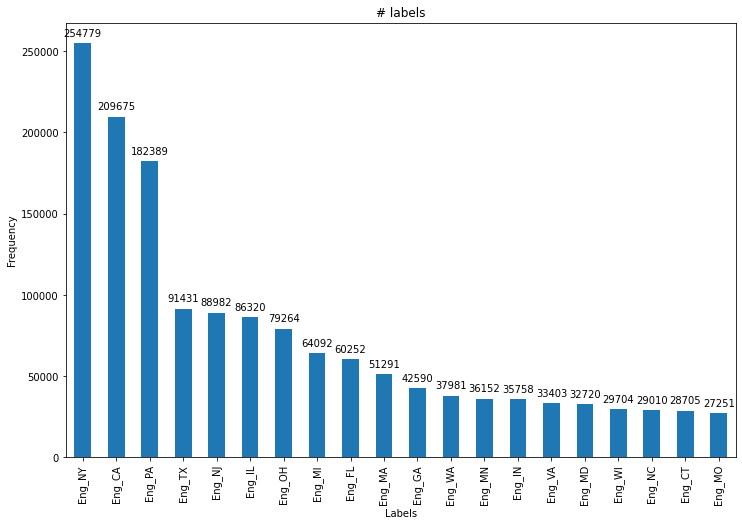

In [34]:
# Check the distribution of the label. 
labels = lang30_region['LABEL'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
ax = labels.plot(kind='bar')
ax.set_title('# labels')
ax.set_xlabel('Labels') 
ax.set_ylabel('Frequency')


def get_bar(ax): 
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
    #     label = "{:.1f}".format(y_value)
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


get_bar(ax)
# plt.savefig("image.png")

In [35]:
s = lang30_region['LABEL'].value_counts().nlargest(95)
print(len(s))
s

95


Eng_NY             254779
Eng_CA             209675
Eng_PA             182389
Eng_TX              91431
Eng_NJ              88982
                    ...  
Eng_Nigeria           567
Eng_Japan             531
Eng_Mexico            530
Eng_Guyana            528
Eng_Afghanistan       471
Name: LABEL, Length: 95, dtype: int64

In [36]:
lang30_region.to_csv(r'label_data/lang30_region.csv', header=True, index=False)

In [37]:
lang30_region.info()
lang30_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978945 entries, 0 to 1978944
Data columns (total 2 columns):
FILENAME    object
LABEL       object
dtypes: object(2)
memory usage: 30.2+ MB


,FILENAME,LABEL
0,split-1-fe_03_00506_A.wav,Eng_CA
1,split-2-fe_03_00506_B.wav,Eng_FL
2,split-3-fe_03_00506_B.wav,Eng_FL
3,split-4-fe_03_00506_A.wav,Eng_CA
4,split-5-fe_03_00506_A.wav,Eng_CA


In [38]:
lang30_region['LABEL'].isnull().sum()

0

In [39]:
# # LabelEncoder
# le = LabelEncoder()
# lang30_region['LABEL'] = le.fit_transform(lang30_region['LABEL'])
# lang30_region.head()

In [40]:
# Pick up additional native languages to create all languages later. 

def conv2(row): 
    if (not row['NATIVE_LANG'] == 'English') and (not row['NATIVE_LANG'] in top30_native_languages): 
        return row['NATIVE_LANG']
    else: 
        return 'other'


lang_rem_region = lang_region.copy()
lang_rem_region['LABEL'] = lang_rem_region.apply(conv2, axis=1)
lang_rem_region = lang_rem_region.drop(['NATIVE_LANG', 'WHERE_RAISED'], axis=1)
lang_rem_region = lang_rem_region[lang_rem_region['LABEL'] != 'other']
lang_rem_region = lang_rem_region.reset_index(drop=True)
lang_rem_region.info()
lang_rem_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45274 entries, 0 to 45273
Data columns (total 2 columns):
FILENAME    45274 non-null object
LABEL       45274 non-null object
dtypes: object(2)
memory usage: 707.5+ KB


,FILENAME,LABEL
0,split-1-fe_03_00508_B.wav,English and Polish
1,split-5-fe_03_00508_B.wav,English and Polish
2,split-7-fe_03_00508_B.wav,English and Polish
3,split-12-fe_03_00508_B.wav,English and Polish
4,split-14-fe_03_00508_B.wav,English and Polish


In [41]:
def conv3(row): 
    if row['LABEL'].find("and") == -1: 
        return row['LABEL']
    else: 
        return 'other'

lang_rem_region['LABEL'] = lang_rem_region.apply(conv3, axis=1)
lang_rem_region = lang_rem_region[lang_rem_region['LABEL'] != 'other']
lang_rem_region = lang_rem_region.reset_index(drop=True)
lang_rem_region.info()
lang_rem_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12876 entries, 0 to 12875
Data columns (total 2 columns):
FILENAME    12876 non-null object
LABEL       12876 non-null object
dtypes: object(2)
memory usage: 201.3+ KB


,FILENAME,LABEL
0,split-2-fe_03_00573_B.wav,Indonesian
1,split-4-fe_03_00573_B.wav,Indonesian
2,split-5-fe_03_00573_B.wav,Indonesian
3,split-7-fe_03_00573_B.wav,Indonesian
4,split-9-fe_03_00573_B.wav,Indonesian


In [42]:
s = lang_rem_region['LABEL'].value_counts()
print(len(s))
s

40


Armenian          850
Punjabi           768
Indonesian        762
Bulgarian         726
Swedish           641
Kannada           595
Patwa             508
Latvian           485
Greek             469
Marathi           434
Dutch             433
Croatian          420
Filipino          359
Czech             358
Tigrinya          332
Thai              315
Shosa             311
Norwegian         298
Danish            291
Kikamba           289
Michif            284
Samoan            269
Taiwanese         227
Igbo              198
Bangla            197
Somali            193
Mongolian         192
Serbian           182
Woloff            171
Ukrainian         163
Slovak            150
Sindhi            144
Finnish           142
Afrikaans         129
Malay             121
Georgian          114
Foarfe            112
Khmer             105
Visayan            89
Serbo-Croatian     50
Name: LABEL, dtype: int64

In [43]:
lang70_region = pd.concat([lang30_region, lang_rem_region])
lang70_region = lang70_region.reset_index(drop=True)
lang70_region.info()
lang70_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991821 entries, 0 to 1991820
Data columns (total 2 columns):
FILENAME    object
LABEL       object
dtypes: object(2)
memory usage: 30.4+ MB


,FILENAME,LABEL
0,split-1-fe_03_00506_A.wav,Eng_CA
1,split-2-fe_03_00506_B.wav,Eng_FL
2,split-3-fe_03_00506_B.wav,Eng_FL
3,split-4-fe_03_00506_A.wav,Eng_CA
4,split-5-fe_03_00506_A.wav,Eng_CA


In [44]:
lang70_region.to_csv(r'label_data/lang70_region.csv', header=True, index=False)